In [18]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data= pd.read_csv('/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
data.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [23]:
data.isna().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [26]:
x=data.drop(labels='DEATH_EVENT', axis=1)
y= data['DEATH_EVENT']
x.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [27]:
#correlation between the variables in the study
data.corr().style.background_gradient(cmap='Spectral').set_precision(2)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.00,0.09,-0.08,-0.10,0.06,0.09,-0.05,0.16,-0.05,0.07,0.02,-0.22,0.25
anaemia,0.09,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.08,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.10,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.06,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.09,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.05,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.16,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,-0.05,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,0.07,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00


Text(0.5, 1.0, 'Age Distribution Graph')

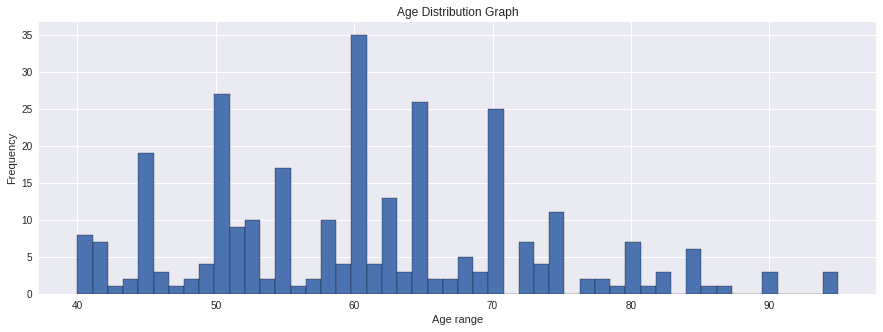

In [28]:
#seeing distribution for age
plt.figure(figsize=(15,5))
plt.hist(data['age'],bins = 50,edgecolor = 'black')
plt.xlabel('Age range')
plt.ylabel('Frequency')
plt.title('Age Distribution Graph')


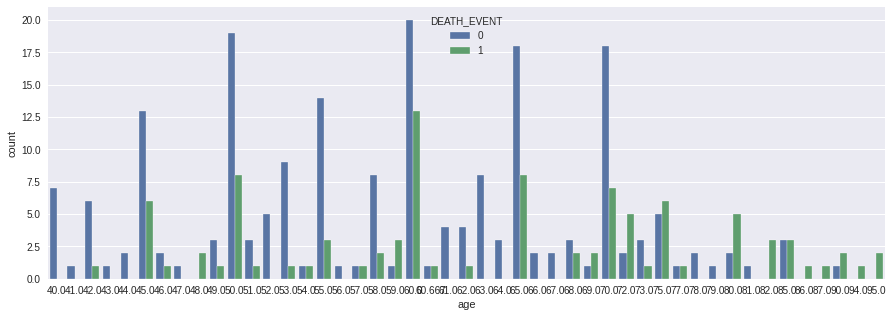

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='DEATH_EVENT', data=data)

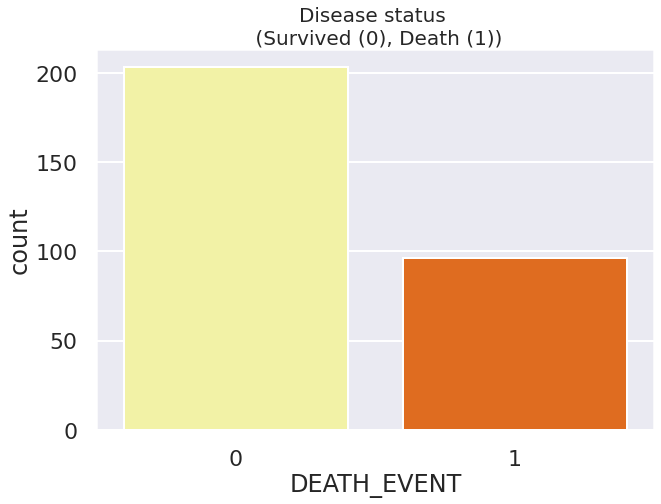

In [30]:
#Prevalence of outcome event
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Disease status \n (Survived (0), Death (1))', fontsize=20)
cols= ["#ffff99","#ff6600"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)
plt.show()


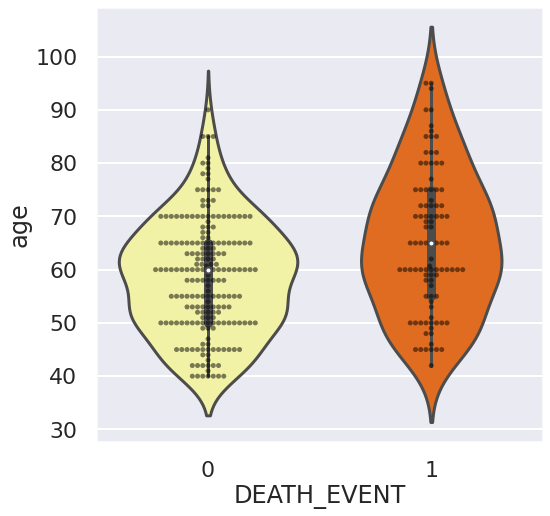

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



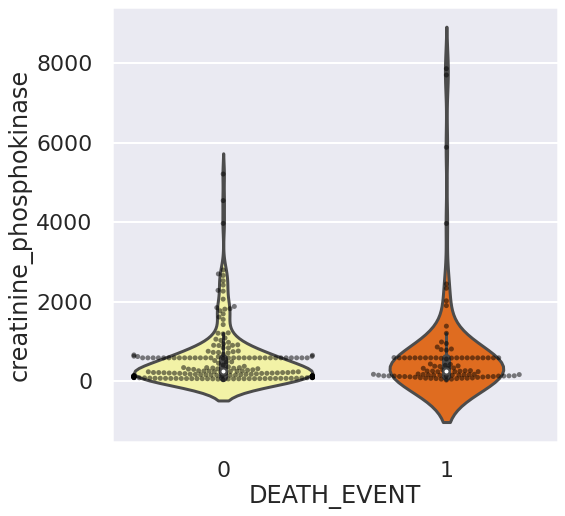

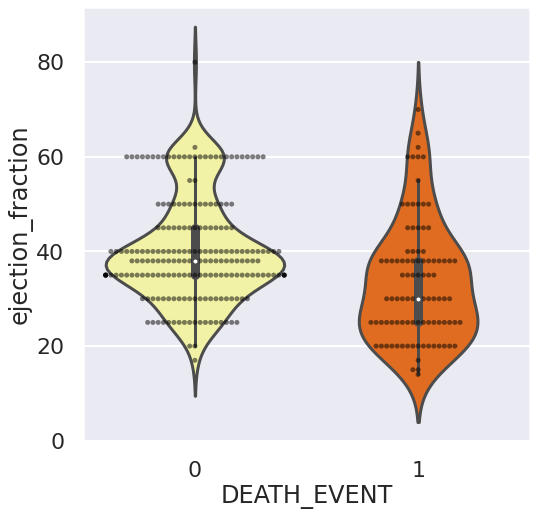

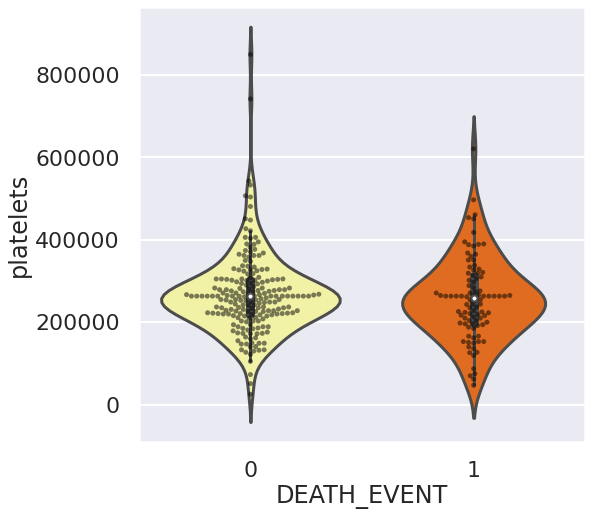

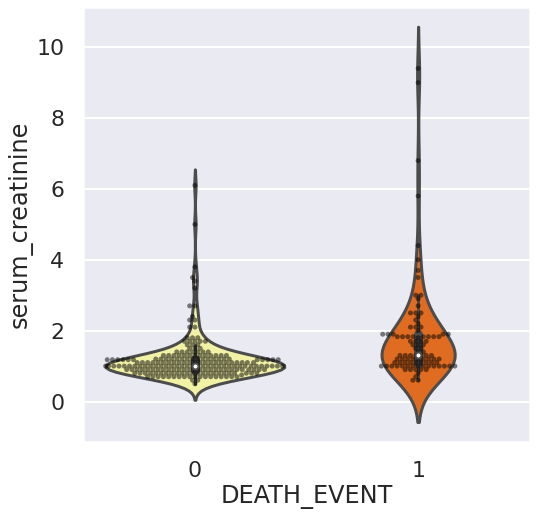

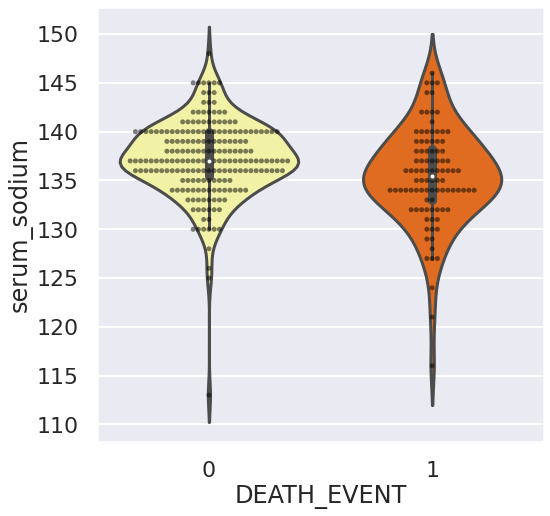

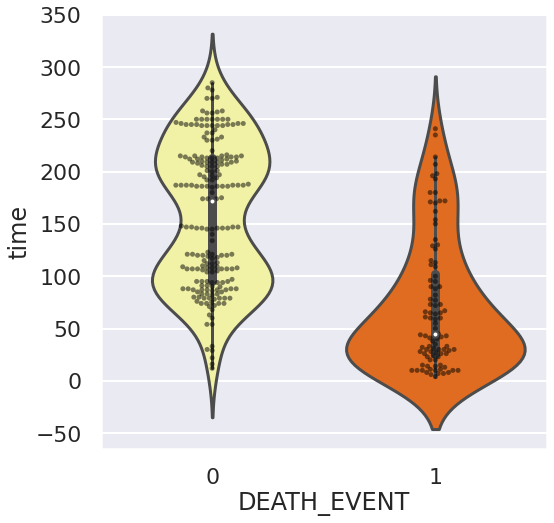

In [31]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.violinplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()


In [32]:
#Standard scaler features of the dataset
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(x)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


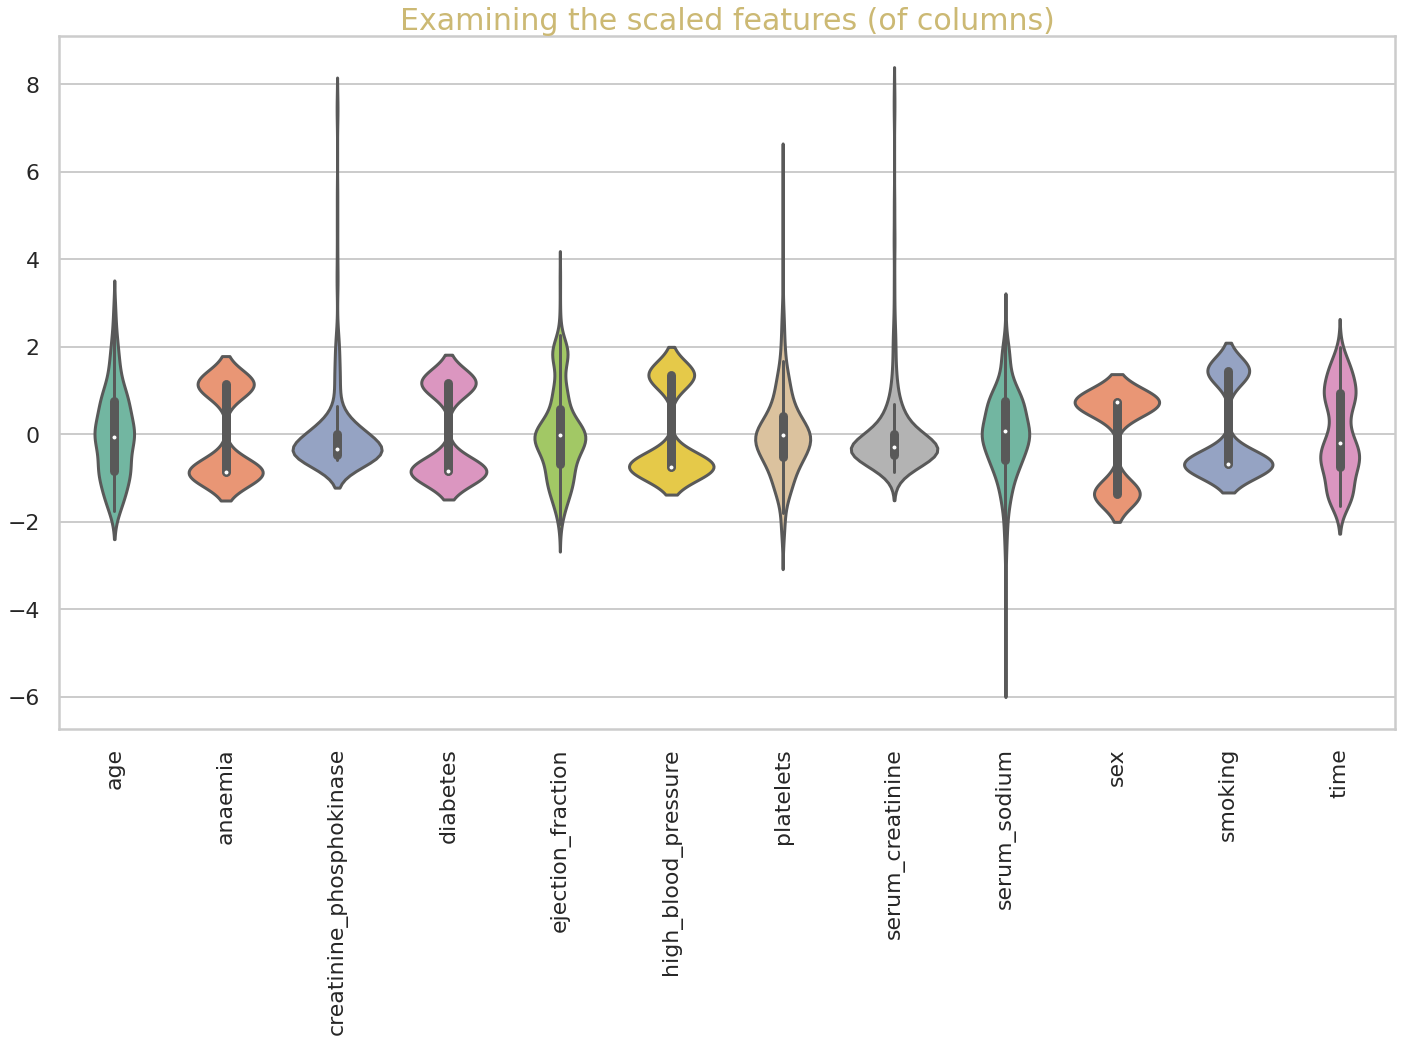

In [33]:
#Examining the scaled features
sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.title('Examining the scaled features (of columns)', color="y",fontsize=30)
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
sns.violinplot(data = X_df,palette = 'Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)


In [36]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_data,y,test_size=0.3,random_state=42)


In [37]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(train_x, train_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
# cheking training accuracy
y_pred = model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy


0.9904306220095693

In [39]:
# cheking initial test accuracy
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy


0.7444444444444445

In [40]:
test_x[0]


array([ 7.71889104e-01, -8.71104775e-01,  1.65728387e-04, -8.47579380e-01,
        1.62199114e-01, -7.35688190e-01, -2.17489593e+00,  1.26466633e+00,
       -1.41976151e-01,  7.35688190e-01,  1.45416070e+00,  1.54533390e+00])

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid={
   
    ' learning_rate':[1,1,0.1,0.5,0.001],
    'max_depth': [3,5,15,30],
    'n_estimators':[10,70,150,300]
    
}


In [43]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=4)


In [44]:
grid.fit(train_x,train_y)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.786, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.905, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.881, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.810, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.927, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=70 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=70, score=0.810, total=   0.0s
[CV]  learning_rate=1, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=150, score=0.857, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=150 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=150, score=0.929, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=150 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=150, score=0.810, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=150 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=150, score=0.878, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.810, total=   0.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.857, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=300, score=0.905, total=   0.1s


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   13.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={' learning_rate': [1, 1, 0.1, 0.5, 0.001],
                         'max_depth': [3, 5, 15, 30],
                         'n_estimators': [10, 70, 15